In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r'Training.csv')
dataset.shape

(4920, 133)

In [3]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
dataset.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
dataset['prognosis'].value_counts()

Psoriasis                                  120
Typhoid                                    120
Heart attack                               120
Hyperthyroidism                            120
Peptic ulcer diseae                        120
Alcoholic hepatitis                        120
Cervical spondylosis                       120
Diabetes                                   120
Hepatitis E                                120
Paralysis (brain hemorrhage)               120
Hepatitis D                                120
(vertigo) Paroymsal  Positional Vertigo    120
Pneumonia                                  120
Fungal infection                           120
Migraine                                   120
Osteoarthristis                            120
Hepatitis B                                120
Impetigo                                   120
Acne                                       120
Hypoglycemia                               120
Common Cold                                120
Arthritis    

In [7]:
X = dataset.iloc[:,0:132].values
y = dataset.iloc[:,-1].values

In [8]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
pred = dt.predict(X_test)

In [12]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
conf = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(conf, index = dataset['prognosis'].unique(), columns = dataset['prognosis'].unique())

In [13]:
f1_score(y_test, pred, average='macro')*100

100.0

In [14]:
accuracy_score(y_test, pred)*100

100.0

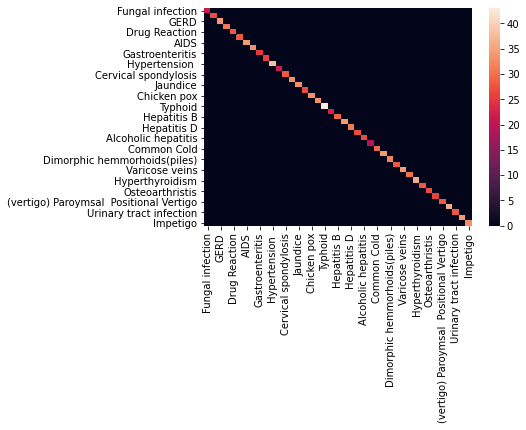

In [15]:
import seaborn as sns
sns.heatmap(df_cm)